<a href="https://colab.research.google.com/github/Vimalkumar27/ML-Projects/blob/main/Student_att_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Attendance Prediction**

## **Load Data**

In [487]:
from google.colab import files
uploaded = files.upload()

Saving student_attendance_500_days_enhanced.csv to student_attendance_500_days_enhanced (3).csv


In [488]:
import pandas as pd
df=pd.read_csv("student_attendance_500_days_enhanced.csv")
df

,Date,Sleep_Hours,Weather,Health_Issue,Internet_Usage_Hours,Basketball_Played,Tournament_Attended,Science_Expo,Play_Time_Hours,Injury,Personal_Leave_Reason,Relationship_Conflict,Exam_Tomorrow,Prepared_For_Exam,Homework_Completed,Other_Reason,Will_Attend_Today
0,2024-02-10 22:57:52.109127,7.8,Rainy,No,2.1,No,No,No,1.1,No,Marriage,Yes,Yes,Yes,Yes,NaN,No
1,2024-02-11 22:57:52.109127,7.0,Rainy,No,5.3,No,No,No,1.4,No,NaN,No,No,No,Yes,NaN,Yes
2,2024-02-12 22:57:52.109127,8.0,Cloudy,No,2.9,No,No,No,2.5,No,NaN,No,No,Yes,Yes,NaN,Yes
3,2024-02-13 22:57:52.109127,9.0,Cloudy,No,6.0,Yes,No,No,2.0,No,NaN,No,No,No,Yes,Overslept,Yes
4,2024-02-14 22:57:52.109127,6.9,Stormy,No,2.2,No,No,No,1.9,No,Emergency,No,Yes,Yes,Yes,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2025-06-19 22:57:52.109127,7.8,Stormy,No,7.3,No,No,No,1.1,No,Marriage,Yes,No,Yes,Yes,NaN,No
496,2025-06-20 22:57:52.109127,6.0,Windy,No,3.2,No,No,No,1.5,No,NaN,Yes,No,Yes,Yes,NaN,Yes
497,2025-06-21 22:57:52.109127,7.0,Sunny,No,1.6,No,No,Yes,1.5,Yes,NaN,Yes,No,Yes,Yes,NaN,Yes
498,2025-06-22 22:57:52.109127,6.1,Windy,No,5.7,No,No,No,0.0,No,Marriage,No,No,No,Yes,NaN,Yes


## **Data Preparation**

In [489]:
y=df['Will_Attend_Today']
y

,Will_Attend_Today
0,No
1,Yes
2,Yes
3,Yes
4,No
...,...
495,No
496,Yes
497,Yes
498,Yes


In [490]:
X=df.drop('Will_Attend_Today',axis=1)
X

,Date,Sleep_Hours,Weather,Health_Issue,Internet_Usage_Hours,Basketball_Played,Tournament_Attended,Science_Expo,Play_Time_Hours,Injury,Personal_Leave_Reason,Relationship_Conflict,Exam_Tomorrow,Prepared_For_Exam,Homework_Completed,Other_Reason
0,2024-02-10 22:57:52.109127,7.8,Rainy,No,2.1,No,No,No,1.1,No,Marriage,Yes,Yes,Yes,Yes,NaN
1,2024-02-11 22:57:52.109127,7.0,Rainy,No,5.3,No,No,No,1.4,No,NaN,No,No,No,Yes,NaN
2,2024-02-12 22:57:52.109127,8.0,Cloudy,No,2.9,No,No,No,2.5,No,NaN,No,No,Yes,Yes,NaN
3,2024-02-13 22:57:52.109127,9.0,Cloudy,No,6.0,Yes,No,No,2.0,No,NaN,No,No,No,Yes,Overslept
4,2024-02-14 22:57:52.109127,6.9,Stormy,No,2.2,No,No,No,1.9,No,Emergency,No,Yes,Yes,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2025-06-19 22:57:52.109127,7.8,Stormy,No,7.3,No,No,No,1.1,No,Marriage,Yes,No,Yes,Yes,NaN
496,2025-06-20 22:57:52.109127,6.0,Windy,No,3.2,No,No,No,1.5,No,NaN,Yes,No,Yes,Yes,NaN
497,2025-06-21 22:57:52.109127,7.0,Sunny,No,1.6,No,No,Yes,1.5,Yes,NaN,Yes,No,Yes,Yes,NaN
498,2025-06-22 22:57:52.109127,6.1,Windy,No,5.7,No,No,No,0.0,No,Marriage,No,No,No,Yes,NaN


### **Feature Selection**

In [492]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of X to avoid changing original data
X_encoded = X.copy()

# Apply Label Encoding to all object columns
for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Now you can apply feature selection
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(XGBClassifier(eval_metric='logloss'))
selector.fit(X_encoded, y_encoded)

selected_features = X_encoded.columns[selector.get_support()].tolist()
print("✅ Selected features:", selected_features)


✅ Selected features: ['Health_Issue', 'Injury', 'Personal_Leave_Reason', 'Exam_Tomorrow', 'Prepared_For_Exam']


### **Featured Engineering Coimbing features**

### **GPU Useage**

In [493]:
from xgboost import XGBClassifier

model = XGBClassifier(
    tree_method="gpu_hist",   # GPU-accelerated algorithm
    predictor="gpu_predictor",  # Optional for GPU prediction
    eval_metric="logloss"
)


### **GPU Check**

In [494]:
import xgboost as xgb
from xgboost import XGBClassifier

try:
    booster = XGBClassifier(tree_method="gpu_hist", predictor="gpu_predictor")
    print("✅ GPU is available for XGBoost!")
except Exception as e:
    print("❌ GPU is not available:", e)


✅ GPU is available for XGBoost!


### **Data Spliting**

In [495]:
from sklearn.preprocessing import LabelEncoder
X = df[important_features].copy()
y = df['Will_Attend_Today']

# Fill NaNs in 'Personal_Leave_Reason' with a default category
X['Personal_Leave_Reason'] = X['Personal_Leave_Reason'].fillna('None')

# Encode all object columns
label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Save encoder for later


# Encode target
target_le = LabelEncoder()
y = target_le.fit_transform(df["Will_Attend_Today"])

In [496]:
from sklearn.model_selection import train_test_split
important_features=[
    'Health_Issue',
    'Injury',
    'Personal_Leave_Reason',
    'Exam_Tomorrow',
    'Prepared_For_Exam'
]
X=X[important_features]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [497]:
X_train


,Health_Issue,Injury,Personal_Leave_Reason,Exam_Tomorrow,Prepared_For_Exam
205,0,1,2,0,1
404,0,0,2,0,1
337,0,0,1,0,1
440,1,0,0,0,0
55,0,0,2,0,0
...,...,...,...,...,...
343,0,0,2,1,1
359,0,0,2,0,0
323,0,0,2,1,1
280,0,0,2,0,0


In [498]:
X_test

,Health_Issue,Injury,Personal_Leave_Reason,Exam_Tomorrow,Prepared_For_Exam
69,0,0,1,1,1
29,0,0,2,0,1
471,0,0,1,0,0
344,0,0,2,0,0
54,1,0,2,0,1
...,...,...,...,...,...
460,0,1,2,0,0
152,0,0,2,0,1
154,1,0,2,0,1
56,0,0,2,1,1


## **Model Building**

### **XGBoost**

In [499]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of your original X
X_encoded = X.copy()

# Loop through all object (string) columns and encode them
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Now split and continue with model training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=100)

# Proceed with GridSearchCV or training
grid.fit(X_train, y_train)
best_model = grid.best_estimator_



### **Applying the Model and predicting**

In [500]:
y_xg_train_pred =best_model.predict(X_train)
y_xg_test_pred = best_model.predict(X_test)
y_xg_train_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,

In [501]:
y_xg_test_pred


array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

### **Model Performance**

In [502]:
y_train

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,

In [503]:
y_xg_train_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,

In [504]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.91
Precision: 0.9512195121951219
Recall: 0.9397590361445783
F1 Score: 0.9454545454545454


## **Visualization**

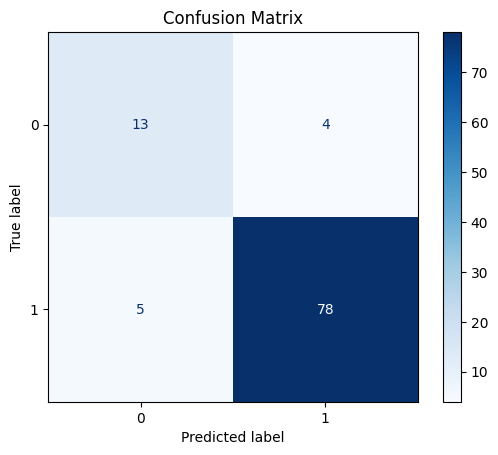

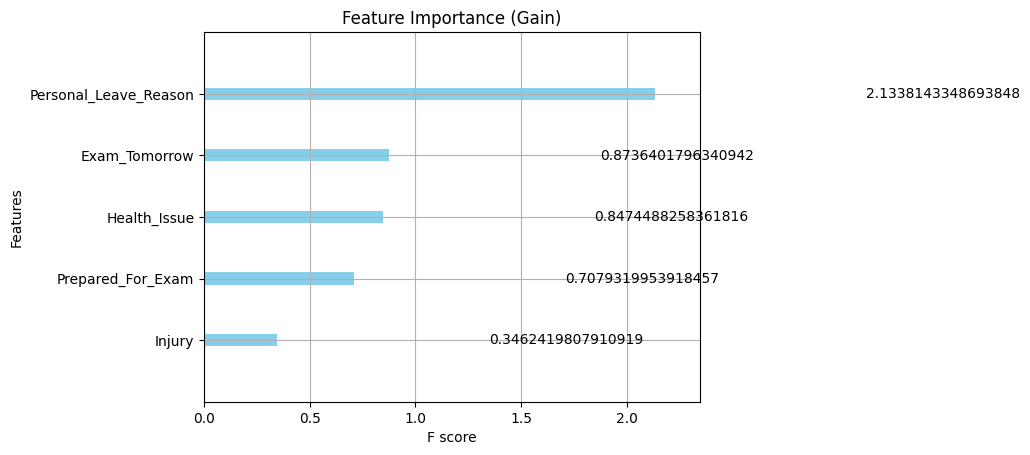

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        17
           1       0.95      0.94      0.95        83

    accuracy                           0.91       100
   macro avg       0.84      0.85      0.84       100
weighted avg       0.91      0.91      0.91       100



In [513]:
important_features = ['Health_Issue', 'Injury', 'Personal_Leave_Reason', 'Exam_Tomorrow', 'Prepared_For_Exam']
X_train = X_train[important_features]
X_test = X_test[important_features]
from xgboost import plot_importance
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Visualize the confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
# Visualize feature importance
plot_importance((best_model), importance_type='gain', max_num_features=10, title='Feature Importance (Gain)', color='skyblue')
plt.show()
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))



In [506]:
print("Training features:", X.columns.tolist())


Training features: ['Health_Issue', 'Injury', 'Personal_Leave_Reason', 'Exam_Tomorrow', 'Prepared_For_Exam']


In [507]:
print("Prediction input features:", input_df.columns.tolist())


Prediction input features: ['Health_Issue', 'Injury', 'Personal_Leave_Reason', 'Exam_Tomorrow', 'Prepared_For_Exam']


In [508]:
print(input_df.dtypes)
print(input_df.head())


Health_Issue             int64
Injury                   int64
Personal_Leave_Reason    int64
Exam_Tomorrow            int64
Prepared_For_Exam        int64
dtype: object
   Health_Issue  Injury  Personal_Leave_Reason  Exam_Tomorrow  \
0             0       0                      2              1   

   Prepared_For_Exam  
0                  0  


In [509]:
import pandas as pd

# Input sample (make sure to use integer-encoded values)
input_data = {
    'Health_Issue': [0],
    'Injury': [0],
    'Personal_Leave_Reason': [2], #2-Marriage,1-sick
    'Exam_Tomorrow': [1],
    'Prepared_For_Exam': [0]
}

input_df = pd.DataFrame(input_data)

# Predict using the trained model (use best_model or xg if that's your model variable)
prediction = best_model.predict(input_df)[0]  # or xg.predict(input_df)[0]

# Print result
print("Predicted Attendance:", "Present" if prediction == 1 else "Absent")


Predicted Attendance: Absent
